**Simple Linear Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


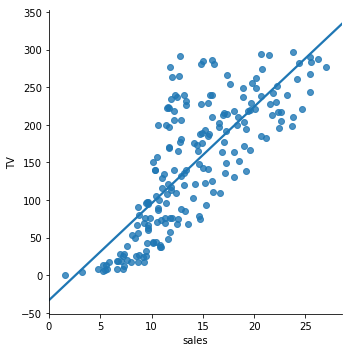

In [3]:
sns.lmplot(x='sales', y='TV', data=advertising, ci=None)

In [4]:
x = advertising['sales']
y = advertising['TV']
std_err = stats.linregress(x,y)
print(stats.linregress(x,y))

LinregressResult(slope=12.871651115358427, intercept=-33.450227765113567, rvalue=0.78222442486160659, pvalue=1.4673897001945922e-42, stderr=0.72854448051698295)


In [5]:
# Values of minimum RSS coefficients
regr = skl_lm.LinearRegression()

X = advertising['TV'].values.reshape(-1,1)
y = advertising['sales']

regr.fit(X,y)
print(regr.intercept_) # B0
print(regr.coef_) # B1

7.03259354913
[ 0.04753664]


In [6]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [7]:
# RSS with regression coefficients
RSS = ((advertising['sales'] - (est.params[0] + est.params[1]*advertising['TV']))**2).sum()/1000
RSS

2.1025305831313506

In [8]:
# RSE
advertising['TV'].count()
RSE = np.sqrt(RSS/198)
RSE

0.10304776236748769

**Multiple Linear Regression**

In [9]:
est = smf.ols('sales ~ TV + radio', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           4.83e-98
Time:                        12:10:34   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F-statistic of 570.3 means that at least one of the predictors must be related to sales

**Multiple Linear Regression with Qualitative Variables**

In [10]:
credit = pd.read_csv('credit.csv')

In [11]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [12]:
credit.set_index('Unnamed: 0')
credit.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [13]:
credit_dummies = pd.get_dummies(credit['Ethnicity'])

In [14]:
credit_dummies = credit_dummies.join(credit['Balance'])

In [15]:
credit_est = smf.ols('Balance ~ Asian + Caucasian', credit_dummies).fit()
credit_est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Asian,-18.6863,65.021,-0.287,0.774,-146.515,109.142
Caucasian,-12.5025,56.681,-0.221,0.826,-123.935,98.930


p-values are very large suggesting no statistical evidence

** Removing additive assumption **

In [16]:
est = smf.ols('sales ~ TV + radio + (TV * radio)', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 14 Feb 2018   Prob (F-statistic):          6.68e-146
Time:                        12:10:34   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

TV advertising of USD1,000 is associated with increased sales of (βˆ1 + βˆ3 × radio) × 1,000 = 19 + 1.1 × radio units. And an increase in radio advertising of USD1,000 will be associated with an increase in sales of ( βˆ2 + βˆ3 × TV) × 1,000 = 29 + 1.1 × TV units.

R-squared increased from 0.897 to 0.968

** Polynomial regression **

In [17]:
auto = pd.read_csv('auto.csv', na_values='?')

In [18]:
auto.dropna()
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [19]:
pd.to_numeric(auto['horsepower']).head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

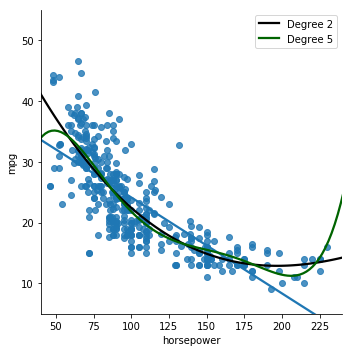

In [20]:
sns.lmplot(x='horsepower', y='mpg', data=auto, ci=None)
sns.regplot(x='horsepower', y='mpg', data=auto, ci=None, label='Degree 2', order=3, scatter=False, color='black')
sns.regplot(x='horsepower', y='mpg', data=auto, ci=None, label='Degree 5', order=5, scatter=False, color='darkgreen')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [21]:
auto['horsepower2'] = auto['horsepower'] ** 2

In [22]:
auto_est = smf.ols(formula='mpg ~ horsepower + horsepower2', data=auto).fit()
auto_est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


** Variance inflation factor **

In [23]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.01138468607
160.668300959
160.592879786


** Lab linear regression **

Simple linear regression

In [24]:
boston = pd.read_csv('Boston.csv')

In [25]:
b_est = smf.ols('medv ~ lstat', boston).fit()
b_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           5.08e-88
Time:                        12:10:34   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not all parameters all included in Python's ols model as they are while running summary(lm.fit) in R. I need to run additional calculations.

In [26]:
RSS_b = ((boston['medv'] - (b_est.params[0] + b_est.params[1] * boston['lstat']))**2).sum()
cnt = boston['lstat'].count()
RSE_b = np.sqrt(RSS_b/(cnt-2))

In [27]:
RSE_b

6.2157604053980702

In [28]:
# residual min and max values
print(min((boston['medv'] - (b_est.params[0] + b_est.params[1] * boston['lstat']))))
print(max((boston['medv'] - (b_est.params[0] + b_est.params[1] * boston['lstat']))))

-15.1674519718
24.5001294619


In [29]:
# residual quartiles
print(np.percentile((boston['medv'] - (b_est.params[0] + b_est.params[1] * boston['lstat'])), 25))
print(np.percentile((boston['medv'] - (b_est.params[0] + b_est.params[1] * boston['lstat'])), 50))
print(np.percentile((boston['medv'] - (b_est.params[0] + b_est.params[1] * boston['lstat'])), 75))

-3.98961188955
-1.31818642534
2.03370101327


In [30]:
b_est.conf_int(alpha=0.025)

,0,1
Intercept,33.288987,35.818694
lstat,-1.037127,-0.862972


In [31]:
b_est.predict()[:5] # not done, the task was to get predicitons for specific values of lstat

array([ 29.8225951 ,  25.87038979,  30.72514198,  31.76069578,  29.49007782])

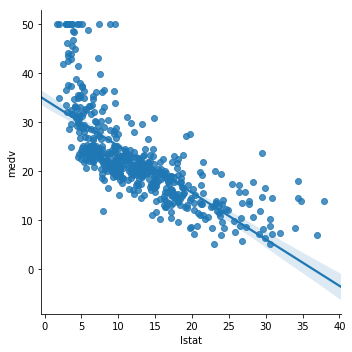

In [32]:
sns.lmplot(x='lstat', y='medv', data=boston)

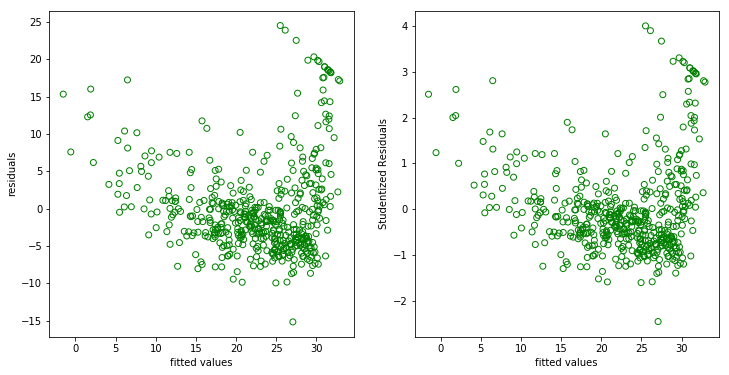

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
residuals = b_est.resid.values
fittedvals = b_est.fittedvalues.values

ax1.scatter(fittedvals, residuals, facecolor='none', edgecolors='g')
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');


# a studentized residual is the quotient resulting from the division of a residual 
# by an estimate of its standard deviation
ax2.scatter(fittedvals, b_est.outlier_test()['student_resid'], facecolor='none', edgecolor='g')
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

In [79]:
# checking the calculated estimated standard deviation
est_stdev = residuals[50]/b_est.outlier_test()['student_resid'][50]

In [77]:
est_stdev 

6.2032309644072141

Multiple Linear Regression

In [82]:
m_est = smf.ols('medv ~ lstat + age', boston).fit()
m_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           2.98e-88
Time:                        13:21:30   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
RSS_m = ((boston['medv'] - (m_est.params[0] + m_est.params[1] * boston['lstat'] + m_est.params[2] * boston['age']))**2).sum()
RSE_m = np.sqrt(RSS_m/(cnt-2))
RSE_m

6.1670090974360301

In [84]:
print(min((boston['medv'] - (m_est.params[0] + m_est.params[1] * boston['lstat'] + m_est.params[2] * boston['age']))))
print(max((boston['medv'] - (m_est.params[0] + m_est.params[1] * boston['lstat'] + m_est.params[2] * boston['age']))))

-15.9812428026
23.1584190277


In [85]:
print(np.percentile((boston['medv'] - (m_est.params[0] + m_est.params[1] * boston['lstat'] + m_est.params[2] * boston['age'])), 25))
print(np.percentile((boston['medv'] - (m_est.params[0] + m_est.params[1] * boston['lstat'] + m_est.params[2] * boston['age'])), 50))
print(np.percentile((boston['medv'] - (m_est.params[0] + m_est.params[1] * boston['lstat'] + m_est.params[2] * boston['age'])), 75))

-3.97747048524
-1.28344310441
1.9683090342


Interaction terms

In [88]:
i_est = smf.ols('medv ~ lstat * age', boston).fit()
i_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           4.86e-88
Time:                        13:43:44   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Non-linear Transformations of the Predictors

In [95]:
boston['sq_lstat'] = boston['lstat'] ** 2

In [96]:
sq_est = smf.ols('medv ~ lstat + sq_lstat', boston).fit()
sq_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 14 Feb 2018   Prob (F-statistic):          1.56e-112
Time:                        13:55:43   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.000      41.149      44.575
lstat         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
sq_lstat       0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# import anova function
from statsmodels.stats.api import anova_lm

anova_table = anova_lm(b_est, sq_est)
print(anova_table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [100]:
poly_est = smf.ols('medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5)', boston).fit()
poly_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 14 Feb 2018   Prob (F-statistic):          8.73e-122
Time:                        14:37:30   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
lstat           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(lstat ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(lstat ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(lstat ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(lstat ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Qualitative predictors